In [1]:
import jax.numpy as jnp 
import matplotlib.pyplot as plt 

try:
    from lqrax import LQR
except:
    %pip install lqrax
    from lqrax import LQR

The `LQR` module solves the following time-varying LQR problem:

$$
\arg\min_{u(t)} \int_0^T \Big[ (x(t)-x_{ref}(t))^\top Q (x(t)-x_{ref}(t)) + u(t)^\top R u(t) \Big] dt
$$
$$
\text{s.t. } \dot{x}(t) = A(t) x(t) + B(t) u(t), \quad x(0) = x_0
$$

In [2]:
class DoubleIntegratorLQR(LQR):
    def __init__(self, dt, x_dim, u_dim, Q, R):
        super().__init__(dt, x_dim, u_dim, Q, R)
    
    def dyn(self, xt, ut):
        return jnp.array([xt[2], xt[3], ut[0], ut[1]])

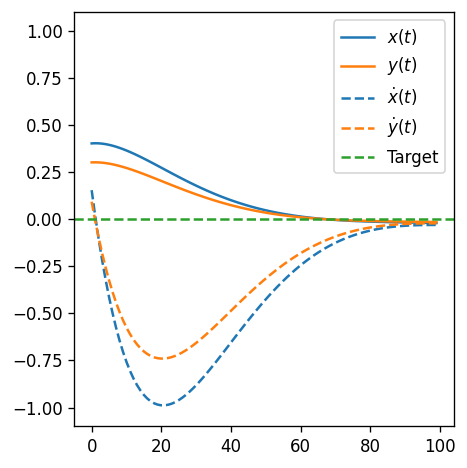

In [3]:
Q = jnp.diag(jnp.array([1.0, 1.0, 0.01, 0.01]))
R = jnp.eye(2) * 0.001
double_integraotr_lqr = DoubleIntegratorLQR(dt=0.01, x_dim=4, u_dim=2, Q=Q, R=R)

tsteps = 100
ref_x_traj = jnp.zeros((tsteps, 4))

x0 = jnp.array([0.4, 0.3, 0.3, 0.2])
dummy_u_traj = jnp.zeros((tsteps, 2))

dummy_x_traj, A_traj, B_traj = double_integraotr_lqr.linearize_dyn(x0, dummy_u_traj)
opt_u_traj, opt_x_traj = double_integraotr_lqr.solve(x0, A_traj, B_traj, ref_x_traj)

fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi=120, tight_layout=True)
ax.set_ylim(-1.1, 1.1)
ax.plot(opt_x_traj[:,0], color='C0', label=r'$x(t)$')
ax.plot(opt_x_traj[:, 1], color='C1', label=r'$y(t)$')
ax.plot(opt_x_traj[:, 2], color='C0', linestyle='--', label=r'$\dot{x}(t)$')
ax.plot(opt_x_traj[:, 3], color='C1', linestyle='--', label=r'$\dot{y}(t)$')
ax.axhline(0.0, 0.0, 1.0, color='C2', linestyle='--', label='Target')
ax.legend()
plt.show()
plt.close()